In [43]:
# import cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
def clean_prep(dataframe):
    """function that removes labels from in between cycles and adds a new column which contains the time in seconds"""
    drop = ['Mode', 'Rest', 'Charge CC', 'Discharge CC', 'TestTime']
    times = dataframe['time']
    drop_index = []
    index = []
    for i in range(len(dataframe['time'])):
        time_0 = str(times[i])
        if time_0 in drop:
            drop_index.append(i)
        else:
            index.append(i)   
    dataframe = dataframe.drop(drop_index)
    # add column with time converted to seconds
    t_sec = []
    times = dataframe['time']
    for i in range(len(index)):
        j = index[i]
        time_0 = str(times[j])
        if len(time_0) < 10:
            days = 0
            hours, minutes, seconds = time_0.split(':')
        else:
            days, time = time_0.split('-')
            hours, minutes, seconds = time.split(':')
        sec = int(days)*86400 + int(hours)*3600 + int(minutes)*60 + int(seconds)
        t_sec.append(sec)
    dataframe['time_sec'] = t_sec
    dataframe = dataframe.set_index('index')
    return dataframe, drop_index


def import_data(filename, sheet_count):
    """function to import and concatenate excel data"""
    names = ['index', 'time', 'voltage', 'current', 'capacity', 'state']
    df = pd.read_excel(filename, sheet_name='Sheet1', header=None, names=names)
    dfl = list([df])
    if sheet_count == 1:
        pass
    else:
        for i in range(1, sheet_count):
            sheet_name='Sheet1(Continued{})'.format(i)
            df0 = pd.read_excel(filename, sheet_name, header=None, names=names)
            dfl.append(df0)
    dff = pd.concat(dfl, ignore_index=True)
    return dff


def return_cylce_indeces(cycle):
    """docstring"""
    cycle_data = []
    start = cycle_break[cycle - 1] + 2
    end = cycle_break[cycle] - 1
    cycle_index = np.arange(start, end)
    return cycle_index


def clean_prep_break(dataframe):
    """
    function that removes labels from in between cycles,
    adds a new column which contains the time in seconds,
    and outputs a list of cycle_breaks
    """
    drop = ['Mode', 'Rest', 'Charge CC', 'Discharge CC', 'TestTime']
    times = dataframe['time']
    drop_index = []
    index = []
    for i in range(len(dataframe['time'])):
        time_0 = str(times[i])
        if time_0 in drop:
            drop_index.append(i)
        else:
            index.append(i)   
    dataframe2 = dataframe.drop(drop_index)
    # add column with time converted to seconds
    t_sec = []
    times = dataframe2['time']
    for i in range(len(dataframe2['time'])):
        j = index[i]
        time_0 = str(times[j])
        if len(time_0) < 10:
            days = 0
            hours, minutes, seconds = time_0.split(':')
        else:
            days, time = time_0.split('-')
            hours, minutes, seconds = time.split(':')
        sec = int(days)*86400 + int(hours)*3600 + int(minutes)*60 + int(seconds)
        t_sec.append(sec)
    dataframe2['time_sec'] = t_sec
#     dataframe2 = dataframe2.set_index('index')
    # converts drop_index to a list of cycle_breaks
    cycle_break = []
    for i in range(len(dataframe.index)):
        if i - 1 in drop_index and i + 1 in drop_index:
            cycle_break.append(i)
        else:
            pass
    return dataframe2, cycle_break
#**********************************************************

In [65]:
# folder holding data of interest
folder = 'Data_2_7_19/'

# imports and concatenates the data for each of the 10 symmetric cells
PP_A_0 = import_data(folder + '_002_4.xls', 3)
# PP_B_0 = import_data(folder + '_002_6.xls', 3)
# PEK_A_0 = import_data(folder + '_002_8.xls', 3)
# PEK_B_0 = import_data(folder + '_005_7.xls', 3)
# PEJ_A_0 = import_data(folder + '_007_4.xls', 3)
# PEJ_B_0 = import_data(folder + '_007_5.xls', 3)
# PI_A_0 = import_data(folder + '_007_6.xls', 3)
# PI_B_0 = import_data(folder + '_007_8.xls', 3)
# Ny_A_0 = import_data(folder + '_008_1.xls', 3)
# Ny_B_0 = import_data(folder + '_007_7.xls', 3)

In [83]:
# cleans and preps dataframes for plotting
PP_A, PP_A_break = clean_prep_break(PP_A_0)
# PP_B, PP_B_break = clean_prep_break(PP_B_0)
# PEK_A, PEK_A_break = clean_prep_break(PEK_A_0)
# PEK_B, PEK_B_break = clean_prep_break(PEK_B_0)
# PEJ_A, PEJ_A_break = clean_prep_break(PEJ_A_0)
# PEJ_B, PEJ_B_break = clean_prep_break(PEJ_B_0)
# PI_A, PI_A_break = clean_prep_break(PI_A_0)
# PI_B, PI_B_break = clean_prep_break(PI_B_0)
# Ny_A, Ny_A_break = clean_prep_break(Ny_A_0)
# Ny_B, Ny_B_break = clean_prep_break(Ny_B_0)

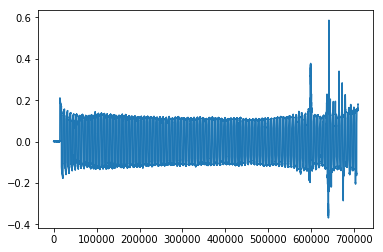

In [84]:
plt.plot(PP_A['time_sec'], PP_A['voltage'])

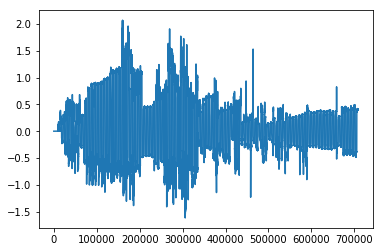

In [48]:
plt.plot(PP_B['time_sec'], PP_B['voltage'])

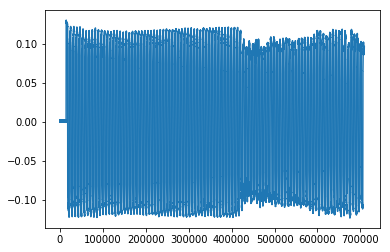

In [49]:
plt.plot(PEK_A['time_sec'], PEK_A['voltage'])

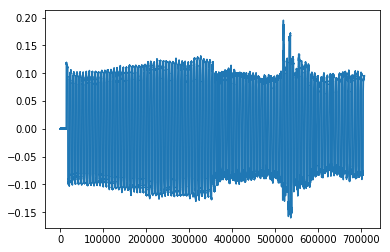

In [50]:
plt.plot(PEK_B['time_sec'], PEK_B['voltage'])

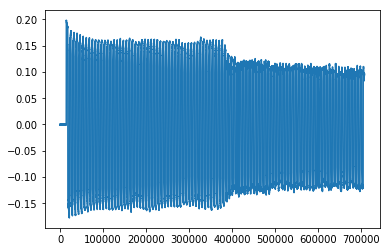

In [51]:
plt.plot(PEJ_A['time_sec'], PEJ_A['voltage'])

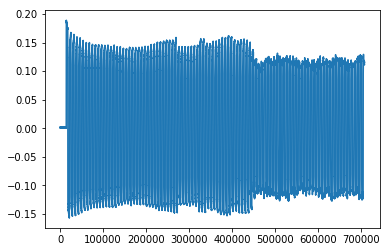

In [52]:
plt.plot(PEJ_B['time_sec'], PEJ_B['voltage'])

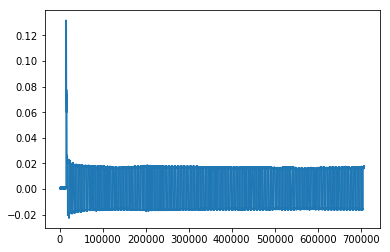

In [53]:
plt.plot(PI_A['time_sec'], PI_A['voltage'])

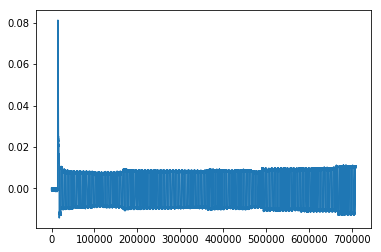

In [54]:
plt.plot(PI_B['time_sec'], PI_B['voltage'])

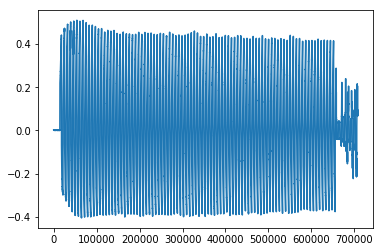

In [55]:
plt.plot(Ny_A['time_sec'], Ny_A['voltage'])

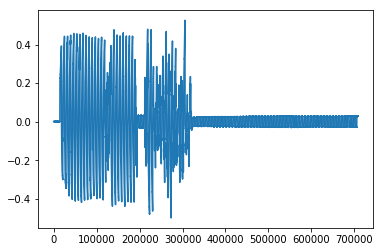

In [56]:
plt.plot(Ny_B['time_sec'], Ny_B['voltage'])

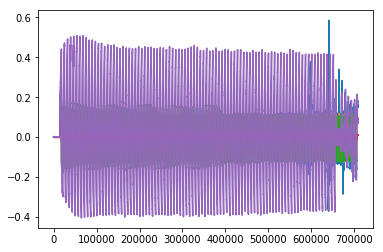

In [57]:
plt.plot(PP_A['time_sec'], PP_A['voltage'])
plt.plot(PEK_A['time_sec'], PEK_A['voltage'])
plt.plot(PEJ_A['time_sec'], PEJ_A['voltage'])
plt.plot(PI_B['time_sec'], PI_B['voltage'])
plt.plot(Ny_A['time_sec'], Ny_A['voltage'])

In [78]:
PP_A_break

[1,
 485,
 1209,
 1933,
 2657,
 3382,
 4106,
 4828,
 5552,
 6276,
 7000,
 7724,
 8448,
 9172,
 9896,
 10620,
 11344,
 12068,
 12793,
 13517,
 14241,
 14965,
 15689,
 16413,
 17137,
 17861,
 18585,
 19309,
 20033,
 20757,
 21481,
 22205,
 22929,
 23653,
 24377,
 25101,
 25825,
 26549,
 27273,
 27997,
 28721,
 29445,
 30169,
 30893,
 31617,
 32341,
 33065,
 33789,
 34513,
 35237,
 35961,
 36685,
 37409,
 38133,
 38857,
 39581,
 40305,
 41029,
 41753,
 42477,
 43201,
 43925,
 44621,
 45345,
 46069,
 46793,
 47517,
 48241,
 48965,
 49689,
 50413,
 51137,
 51861,
 52585,
 53309,
 54033,
 54757,
 55481,
 56205,
 56929,
 57652,
 58376,
 59100,
 59824,
 60548,
 61272,
 61996,
 62720,
 63444,
 64168,
 64892,
 65616,
 66340,
 67064,
 67788,
 68512,
 69236,
 69960,
 70684,
 71408,
 72132,
 72856,
 73580,
 74304,
 75028,
 75751,
 76459,
 77183,
 77907,
 78631,
 79355,
 80079,
 80803,
 81527,
 82251,
 82975,
 83699,
 84423,
 85147,
 85871,
 86595,
 87319,
 88043,
 88767,
 89491,
 90215,
 90939,
 91

In [85]:
PP_A.head(490)

,index,time,voltage,current,capacity,state,time_sec
3,1,00:00:00,0.0009,0,0,R,0
4,2,00:00:30,0.0003,0,0,R,30
5,3,00:01:00,0.0003,0,0,R,60
6,4,00:01:30,0.0006,0,0,R,90
7,5,00:02:00,0.0006,0,0,R,120
8,6,00:02:30,0.0006,0,0,R,150
9,7,00:03:00,0.0003,0,0,R,180
10,8,00:03:30,0.0003,0,0,R,210
11,9,00:04:00,0.0003,0,0,R,240
12,10,00:04:30,0.0006,0,0,R,270


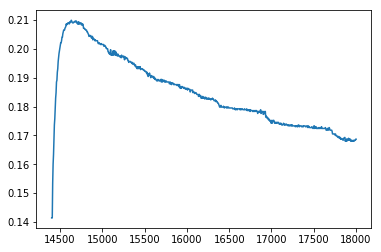

In [95]:
cycle_indeces = return_cylce_indeces(2)

cycle_data = PP_A[PP_A.index.isin(cycle_indeces)]
plt.plot(cycle_data['time_sec'], cycle_data['voltage'])

To do:
    
1. break the cycle_break data in charge and discharge lists
2. write a function for plotting a specific cycle
3. write a function that will allow for plotting a range of cycles